In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt_train=pd.read_csv(r"D:\Data_Science & Analytics\Virtual compt2\train_ctrUa4K.csv")
dt_test=pd.read_csv(r"D:\Data_Science & Analytics\Virtual compt2\test_lAUu6dG.csv")

**Preprocessing**

In [4]:
# TRAIN DATA
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dt_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dt_train=dt_train.drop(['Loan_ID',"Gender",'Married','Dependents','Education'],axis=1)
dt_train

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
dt_train.isna().sum()

Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Self_Employed      582 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         592 non-null    float64
 4   Loan_Amount_Term   600 non-null    float64
 5   Credit_History     564 non-null    float64
 6   Property_Area      614 non-null    object 
 7   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 38.5+ KB


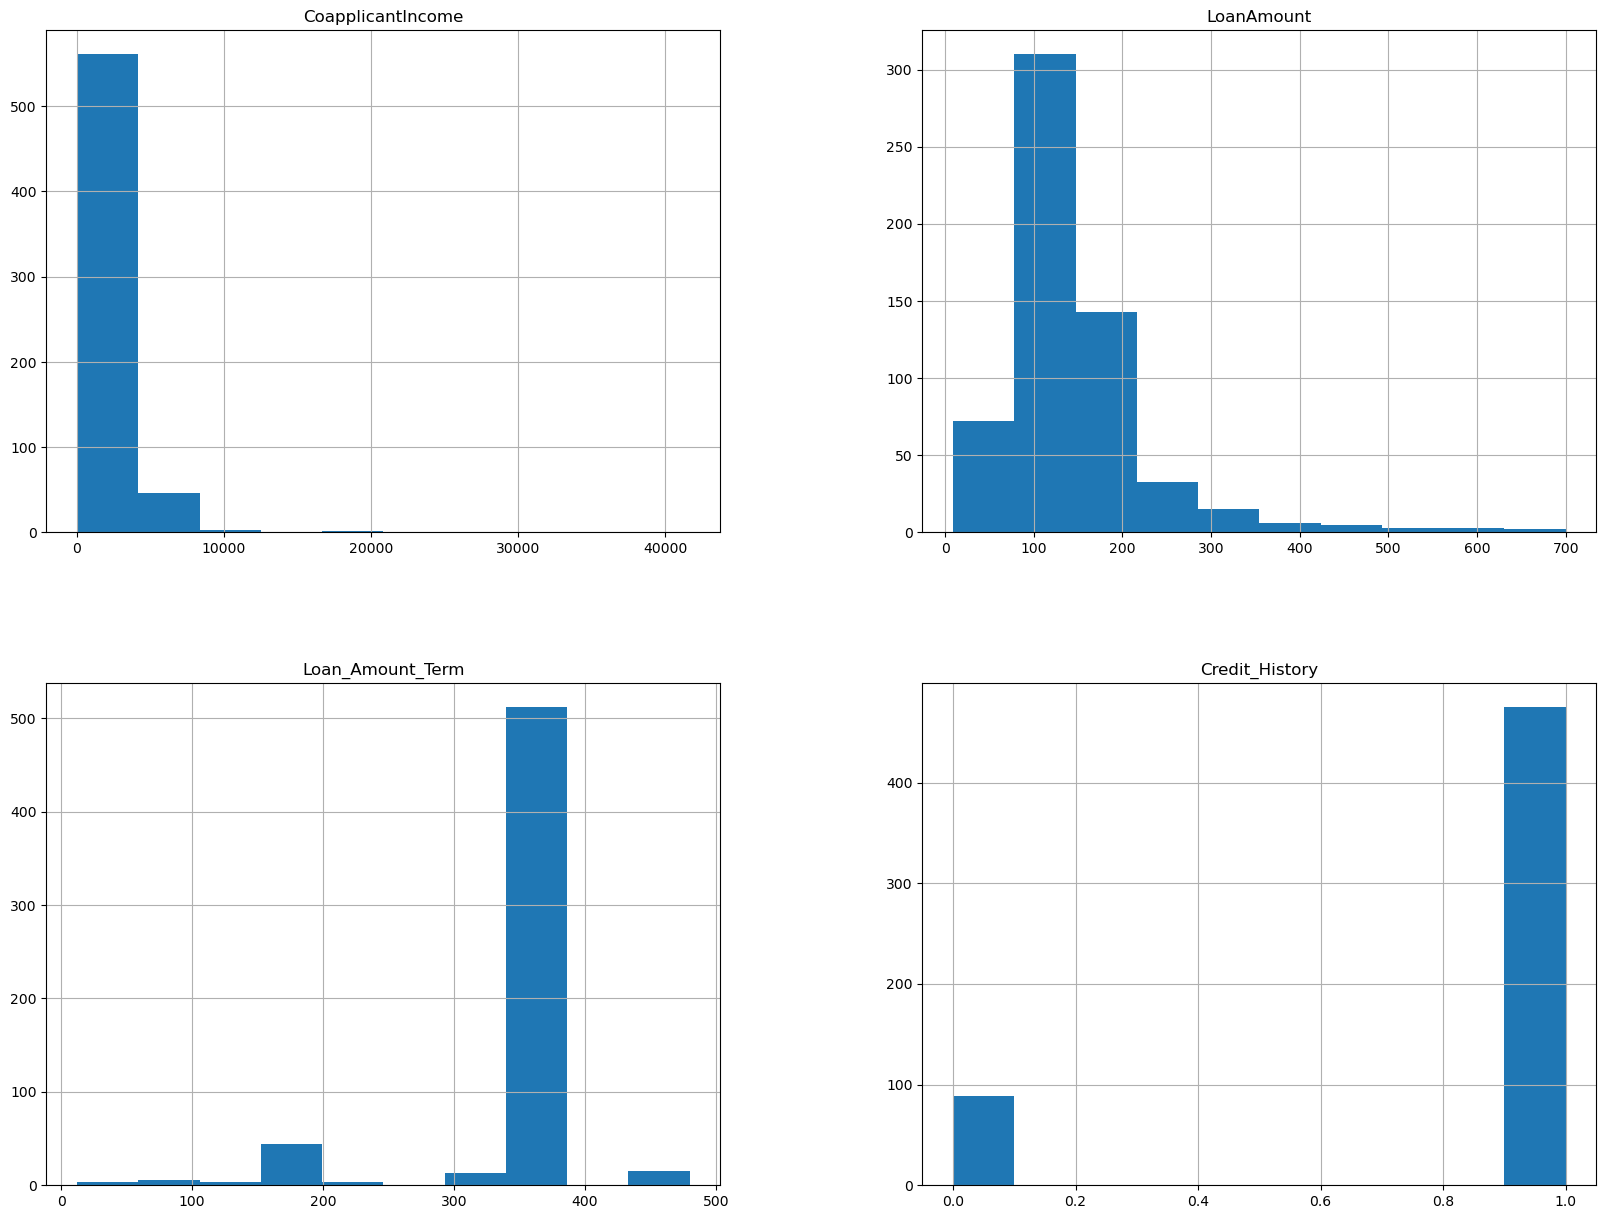

In [9]:
freqgraph=dt_train.select_dtypes(include="float64")   #Check the skeweness of the variables
freqgraph.hist(figsize=(20,15));

In [10]:
dt_train["CoapplicantIncome"]=dt_train["CoapplicantIncome"].fillna(dt_train["CoapplicantIncome"].median()) 
dt_train["LoanAmount"]=dt_train["LoanAmount"].fillna(dt_train["LoanAmount"].median()) 
dt_train["Self_Employed"]=dt_train["Self_Employed"].fillna(dt_train["Self_Employed"].mode())
dt_train["Loan_Amount_Term"]=dt_train["Loan_Amount_Term"].fillna(method='ffill')
dt_train["Credit_History"]=dt_train["Credit_History"].fillna(method='ffill')

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [12]:
dt_train['Self_Employed']=le.fit_transform(dt_train['Self_Employed'])
dt_train['Property_Area']=le.fit_transform(dt_train['Property_Area'])
dt_train['Loan_Status']=le.fit_transform(dt_train['Loan_Status'])

In [13]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Self_Employed      614 non-null    int32  
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Property_Area      614 non-null    int32  
 7   Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 31.3 KB


In [14]:
dt_train.isna().sum()

Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
dt_train

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,8072,240.0,253.0,360.0,1.0,2,1
612,0,7583,0.0,187.0,360.0,1.0,2,1


In [18]:
dt_train.describe()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.237785,5403.459283,1621.245798,145.752443,341.628664,0.835505,1.037459,0.687296
std,0.534737,6109.041673,2926.248369,84.107233,65.656819,0.371027,0.787482,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


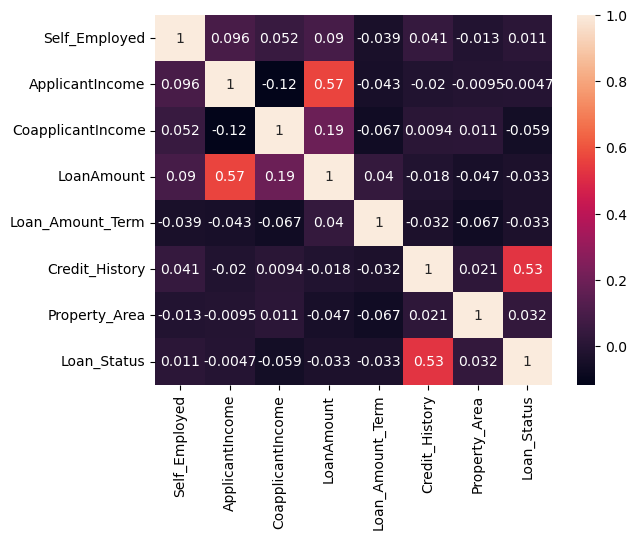

In [19]:
sns.heatmap(dt_train.corr(),annot=True);

In [20]:
#preprocessing testdata

In [21]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [22]:
dt_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
dt_test=dt_test.drop(['Loan_ID',"Gender",'Married','Dependents','Education'],axis=1)
dt_test

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,No,5720,0,110.0,360.0,1.0,Urban
1,No,3076,1500,126.0,360.0,1.0,Urban
2,No,5000,1800,208.0,360.0,1.0,Urban
3,No,2340,2546,100.0,360.0,NaN,Urban
4,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...
362,Yes,4009,1777,113.0,360.0,1.0,Urban
363,No,4158,709,115.0,360.0,1.0,Urban
364,No,3250,1993,126.0,360.0,NaN,Semiurban
365,No,5000,2393,158.0,360.0,1.0,Rural


In [24]:
dt_test.isna().sum()

Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [25]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Self_Employed      344 non-null    object 
 1   ApplicantIncome    367 non-null    int64  
 2   CoapplicantIncome  367 non-null    int64  
 3   LoanAmount         362 non-null    float64
 4   Loan_Amount_Term   361 non-null    float64
 5   Credit_History     338 non-null    float64
 6   Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 20.2+ KB


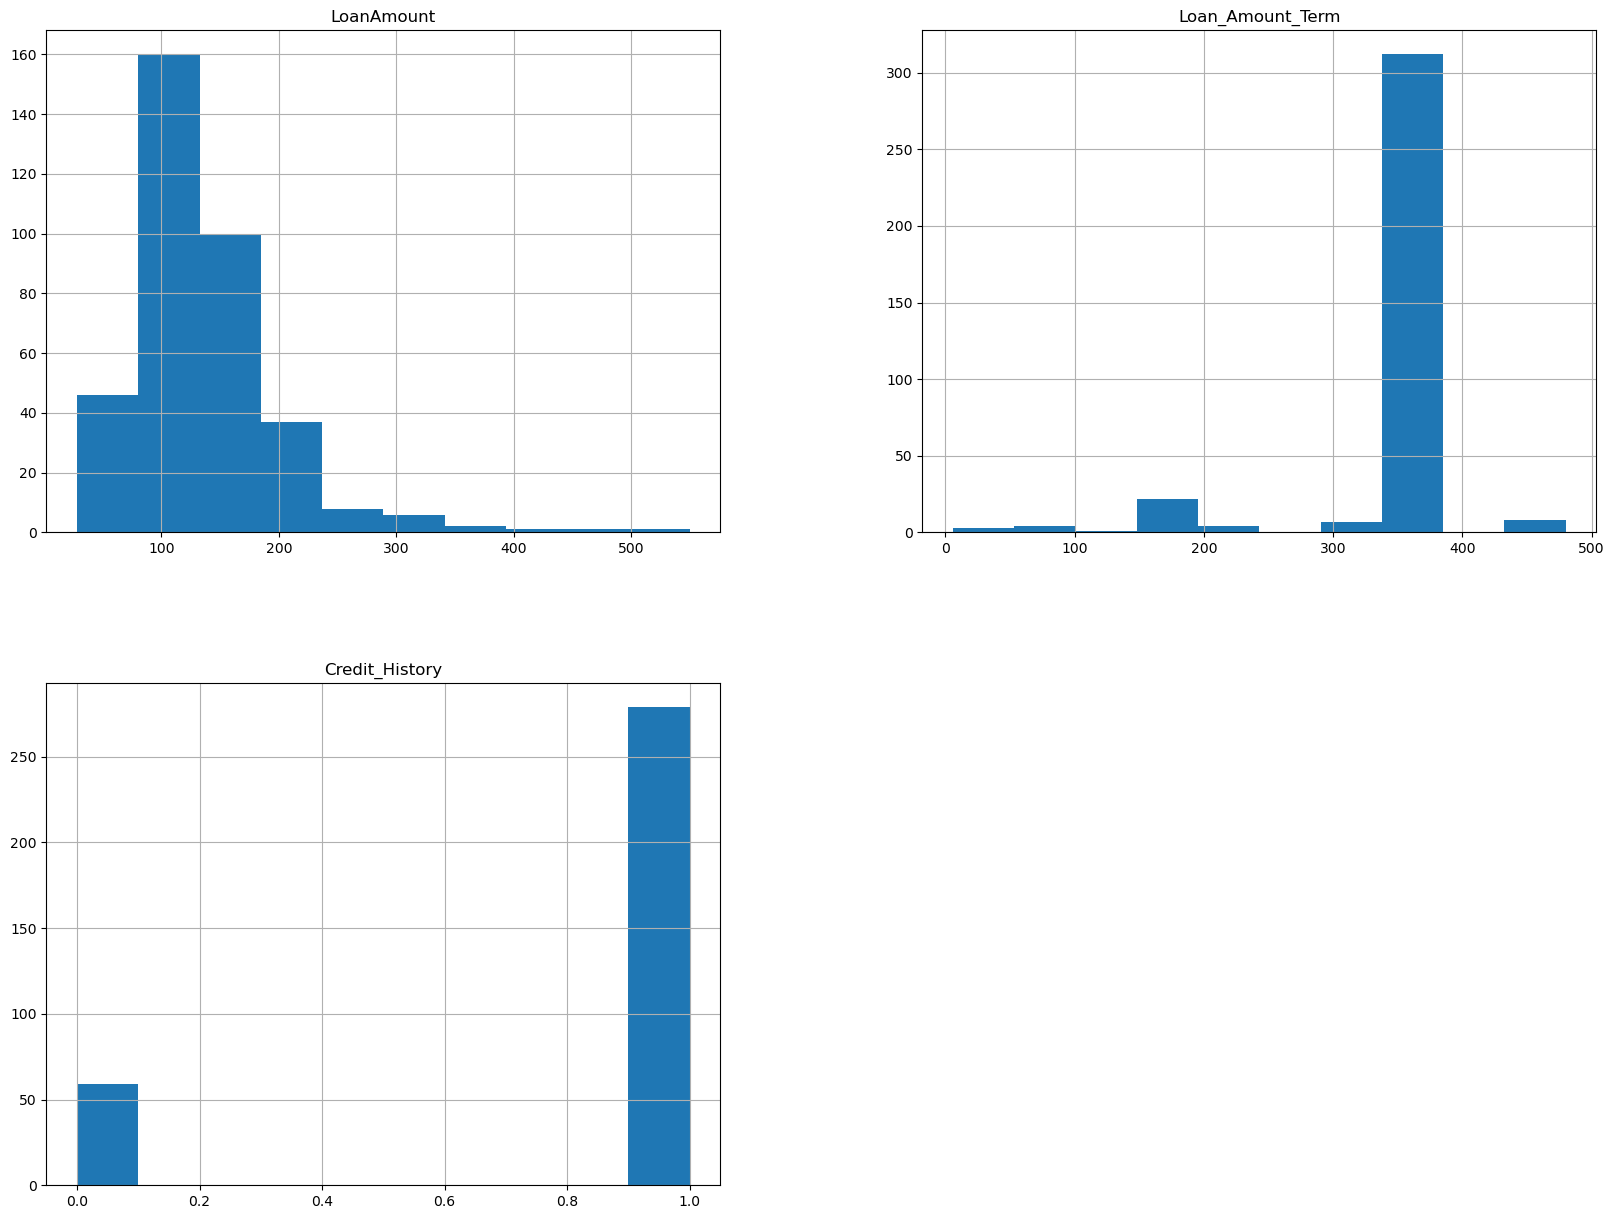

In [26]:
freqgraph=dt_test.select_dtypes(include="float64")   #Check the skeweness of the variables
freqgraph.hist(figsize=(20,15));

In [27]:
dt_test["LoanAmount"]=dt_test["LoanAmount"].fillna(dt_test["LoanAmount"].median())
dt_test["Loan_Amount_Term"]=dt_test["Loan_Amount_Term"].fillna(method='ffill')
dt_test["Credit_History"]=dt_test["Credit_History"].fillna(method='ffill')

In [28]:
#LABEL ENCODING TEST DATA
dt_test['Self_Employed']=le.fit_transform(dt_test['Self_Employed'])
dt_test['Property_Area']=le.fit_transform(dt_test['Property_Area'])

In [29]:
dt_test.describe()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.226158,4805.599455,1569.577657,135.980926,342.332425,0.833787,1.079019
std,0.548791,4910.685399,2334.232099,60.959739,65.208104,0.372780,0.824337
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000
75%,0.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,2.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


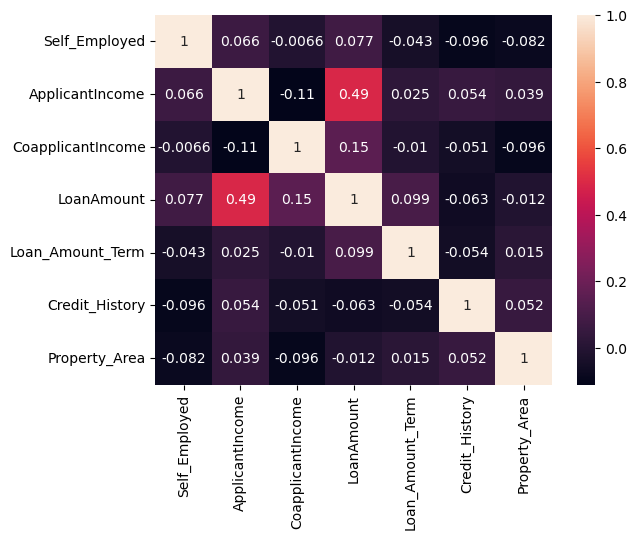

In [30]:
sns.heatmap(dt_test.corr(),annot=True);

In [32]:
#X_train, y_train ,X_test

X_train=dt_train.drop('Loan_Status',axis=1)
y_train=dt_train['Loan_Status']
X_test=dt_test

In [34]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

**CREATE MODELS**

In [37]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression  
log_reg=LogisticRegression()

In [38]:
log_reg.fit(X_train_sc,y_train)
log_pred=log_reg.predict(X_test_sc)

In [39]:
log_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

**FINE TUNING**

In [40]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [41]:
for train_index,test_index in kfold_validator.split(X_train_sc,y_train):
    print("Training index: ",train_index)
    print("Testing index: ",test_index)

Training index:  [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 3

In [42]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(log_reg,X_train_sc,y_train,cv=kfold_validator)

In [43]:
cv_result

array([0.79032258, 0.82258065, 0.75806452, 0.74193548, 0.78688525,
       0.80327869, 0.86885246, 0.85245902, 0.81967213, 0.81967213])

In [44]:
cv_result.mean()

0.80637228979376

In [45]:
#SAMPLE SUBMISSION FILE
dt_samp=pd.read_csv(r"D:\Data_Science & Analytics\Virtual compt2\sample_submission_49d68Cx.csv")
dt_samp

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [46]:
pred_val=[]    #find the outlier values to list
for i in log_pred:
    if i==0:
     pred_val.append('N')
    else:
     pred_val.append('Y')
                    
print(pred_val)      
    

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',

In [47]:
dt_samp['Loan_Status']=pred_val  #Replace value in sample submission data

In [48]:
dt_samp

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [49]:
#SAVE AS CSV
dt_samp.to_csv("D:\Data_Science & Analytics\Virtual compt2/loanStatus_LogSc_data.csv",index=False)